# Fundamentals of fMRI data analysis 
## fMRI data manipulation and plotting in Python

In this assignment, your task is to complete a few exercises related to data manipulation and plotting in Python.

You can choose to answer in Polish or English (this will not affect your grade).

--------------------


**1. Find a one scientific article reporting fMRI findings (search via google Scholar, PubMed). In a paragraph describing fMRI data acquisition, find details about MRI/fMRI scanning parameters such as TR, voxel size, slice thickness, field of view, matrix size, and number of volumes. Fill the information below:**

Article (Authors, year, title, journal): 
> Udało mi się znaleźć w tym badaniu informacje głównie związane z funkcjonalnym MRI, aczkolwiek część informacji podanych przez badaczy wydawała się dopasowana do polecenia, dlatego postanowiłam ją umieścić w sekcji T1. Informacje pochodzą z całego raportu, który został umieszczony przez badaczy w artykule źródłowym.

#### *Yunbo Yang, Ulrike Lueken, Jan Richter, Alfons Hamm, André Wittmann, Carsten Konrad, Andreas Ströhle, Bettina Pfleiderer, Martin J. Herrmann, Thomas Lang, Martin Lotze, Jürgen Deckert, Volker Arolt, Hans-Ulrich Wittchen, Benjamin Straube, and Tilo Kircher* (2020) _Effect of CBT on Biased Semantic Network in Panic Disorder: A Multicenter fMRI Study Using Semantic Priming_ **American Journal of Psychiatry 2020** 177:3, 254-264.


*Structural scan (T1):*

- voxel size = 1.5
- slice thicknes = 3.8 mm
- FOV = 230 mm
- matrix size = 64 × 64 matrix

*Functional scan (T2*):*
- TR = = 2,000 ms
- voxel size = 1.5
- slice thicknes = 3.8 mm
- FOV = 230 mm
- matrix size = 64 × 64 matrix 
- number of volumes =  435 transversal functional images  

**2. Find a portrait photo (.jpg) of your favourite TV series or movie character (head and shoulders) and complete exercises.**

- Crop a photo using online tool (https://www.iloveimg.com/crop-image) to size 400 x 400 (face has to be in the center of image)
- Manipulate the image in python (fill code below)

In [178]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import nilearn as nii
import pandas as pd
import matplotlib.image as mpimg


<class 'numpy.ndarray'>


(2133, 1855, 3)

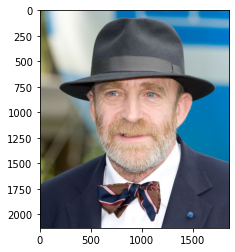

In [179]:
# Load the image 
image = mpimg.imread('images\gessler.jpg')
plt.imshow(image)

# Print shape and type of the image
print(type(image))
image.shape

(2133, 1855)


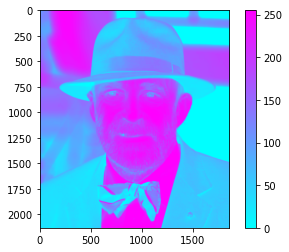

In [180]:
# Create a new variable containing only the first (RED) channel of image (e.g. new_image = image[:,:,0])
one_channel = image[:,:,0]
print(one_channel.shape)
plt.imshow(one_channel)

# Plot the new image using plt.imshow with changed cmap and colorbar
img = plt.imshow(one_channel, cmap = 'cool')

plt.colorbar()


In [181]:
# Save the new image as numpy array (use np.save())
np.save('Adam Gessler', img)
# Saved the file as .npy


Example solution: 

<img style="float: left" img src="images/screenshot_solution.png" width="300" >


**3. Load structural (T1) MRI image in python and select a one sagittal brain section that nicely presents the hippocampus.**

In [182]:
# Load libraries
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import nibabel as nib
from nilearn import plotting, image
import numpy as np
import scipy.ndimage as ndi
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [183]:
# Load MRI image in python (.nii file in "data" folder with "t1" in filename)
mri_path = 'data/sub-01_T1w_space-MNI152NLin2009cAsym_preproc.nii.gz'
mri = image.load_img(mri_path)

# Print shape and type of the image
print(type(mri))
mri.shape


<class 'nibabel.nifti1.Nifti1Image'>


(193, 229, 193)

(193, 229, 193)


C:\Users\karol\AppData\Local\Temp\ipykernel_23964\2195096408.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_array = mri.get_data()


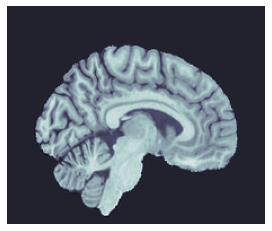

In [196]:
# Plot sagittal section of the MRI image presenting the hippocampus
import scipy.ndimage as ndi
mri_array = mri.get_data()
print(mri_array.shape)
plt.imshow(ndi.rotate(mri_array[90,:,:], 90), cmap='bone')
plt.axis('off')
plt.show()


**4. Load functional MRI (fMRI) image in python and select a one sagittal brain section that nicely presents the hippocampus.**

In [185]:
# Load fMRI image in python (.nii file in "data" folder with "bold" in filename)
fmri_path = 'data/sub-01_ses-1_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
fmri = image.load_img(fmri_path)

# Print shape and type of fMRI image
print(fmri.shape)
print(type(fmri))


(65, 77, 56, 50)
<class 'nibabel.nifti1.Nifti1Image'>


<class 'numpy.ndarray'>
[[ 3.36865658  9.44796407  8.70658511 ... 10.63417041  9.29968828
   6.33417243]
 [10.930722   13.15485889 11.22727358 ...  5.29624188  8.41003352
  12.56175572]
 [10.78244621 13.59968626 16.26865053 ...  2.47900182 -0.63478982
  14.78589261]
 ...
 [ 6.03762084  4.25831133  6.03762084 ...  4.11003554  3.66520816
   0.55141652]
 [ 4.40658712  1.88589865  4.8514145  ...  2.33072603  2.03417444
   1.29279548]
 [ 2.18245023  1.88589865  2.47900182 ...  1.14451969  1.58934706
   1.44107127]]
[[ 7.37210298  4.8514145   6.03762084 ...  6.48244822  6.9272756
   5.14796609]
 [11.67210096 11.82037675 10.18934304 ... 16.41692632  3.51693237
   2.77555341]
 [ 8.26175773  9.59623986 15.23071998 ... 18.78933901  4.70313871
   1.88589865]
 ...
 [ 7.07555139  6.63072401  9.00313669 ...  8.8548609   8.41003352
   4.70313871]
 [ 3.51693237  3.51693237  5.88934505 ...  6.18589664  3.51693237
   3.66520816]
 [ 2.03417444  3.66520816  1.58934706 ...  2.33072603  1.29279548
   0.9962

C:\Users\karol\AppData\Local\Temp\ipykernel_23964\2050784573.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  np_array = fmri.get_data()


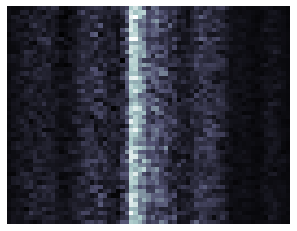

In [186]:
# convert nibabel data structure to numpy array 
np_array = fmri.get_data()
print(type(np_array))
np_array.shape

# create two variables (voxel_1, voxel_2) that store BOLD timeseries from two selected voxels. 
# Try to select voxels that lie very close to each other in space.
voxel1 = np_array[:,20,50]
voxel2 = np_array[:,17,50]
print(voxel1)
print(voxel2)

plt.imshow(ndi.rotate(voxel2, 90), cmap='bone')
plt.axis('off')
plt.show()

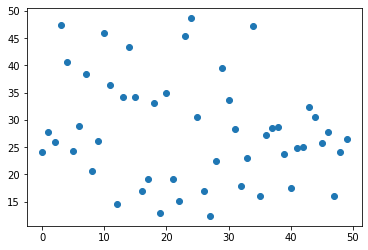

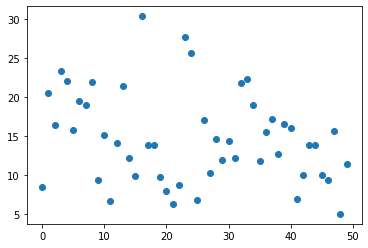

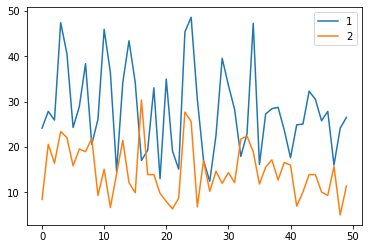

In [187]:
# plot timeseries from one voxel on one plot
voxel1 = np_array[15,20,50]
voxel2 = np_array[15,17,50]
vector = np.arange(0,50)
plt.scatter(vector,voxel1)
plt.show()
plt.scatter(vector, voxel2)
plt.show()
# I've plotted first and second voxel using the scatter plot and chosen vector
plt.plot(vector,voxel1)
plt.plot(vector,voxel2)
plt.legend('1''2')
plt.show() #I've plotted both voxels to analize the difference between two sets of data; "1" is linked to the voxel1 and "2" to the voxel2.


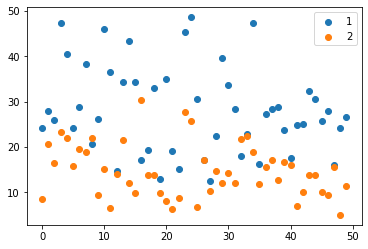

In [188]:
# plot the relationship between two voxels (use scatterplot). Do you have some observations?
plt.scatter(vector,voxel1)
plt.scatter(vector,voxel2)
plt.legend('1''2')
plt.show()
#Scatter plot of both voxels


> Na przedstawionym wykresie można dostrzec pewną rozbieżność między aktywacją pierwszego z wybranych wokseli, a funkcjonalnością drugiego. Pierwszy (oznaczony "1") oddznacza się większą aktywnością, ale też większą wariancją, wprost przeciwnie do numeru "2".


**5*. (optional; for magical points) Use MRI data to create a visualization for a new logo of our "Fundamentals fMRI analysis" course GitHub page (https://github.com/fMRIAnalysisCourse).

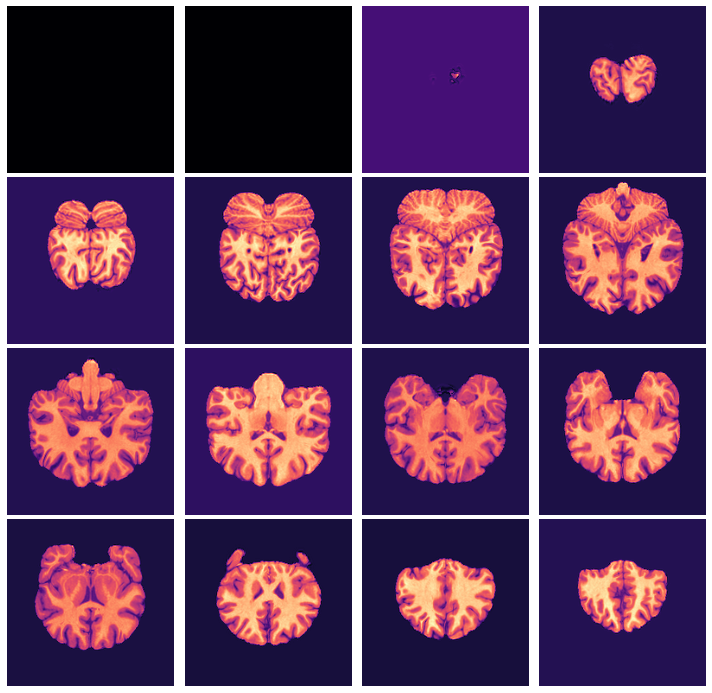

In [189]:
# Optional code
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = mri_array.shape[0]
n_slice = mri_array.shape[1]
n_slice = mri_array.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)
fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(mri_array[:, img, :], 270), 
                         cmap='magma')
    axs.flat[idx].axis('off')
    plt.tight_layout()

plt.show()

In [190]:
fig.savefig('Braintastic.png', dpi = 400)


(4000, 4000)


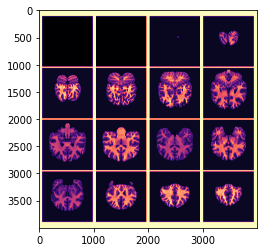

In [195]:
image_brain = mpimg.imread('images\Braintastic.png')
plt.imshow(image_brain)

one_channel = image_brain[:,:,1]
print(one_channel.shape)
plt.imshow(one_channel)

# Change colormap of the image
v = plt.imshow(one_channel, cmap = 'magma')



In [193]:
np.save('Magmaaaa.png',image_brain)


(193, 229, 193)


C:\Users\karol\AppData\Local\Temp\ipykernel_23964\3687880862.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_array = mri.get_data()


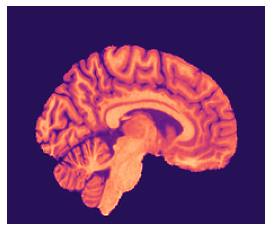

In [194]:
mri_array = mri.get_data()
print(mri_array.shape)
plt.imshow(ndi.rotate(mri_array[90,:,:], 90), cmap='magma')
plt.axis('off')
plt.show()
fig.savefig('Fig_brain.jpg', dpi = 400)

In [176]:
fig.savefig('Newbraintime.jpg', dpi = 400)

> Stworzyłam 2 nowe loga i trudno mi ocenić, które jest lepsze - oba wydają się mieć zalety.